In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf 
from tensorflow import keras 
import seaborn as sns 
import os 
from datetime import datetime 

import warnings 
warnings.filterwarnings("ignore") 


In [2]:
data = pd.read_csv('C:/Users/chopr/OneDrive/Desktop/stock5yrs.csv') 
print(data.shape) 
print(data.sample(7)) 


(619040, 7)
              date    open    high       low   close   volume  Name
116344  22-03-2016   72.97   73.81   72.9700   73.48   718503  CHRW
352551  06-08-2013   26.93   27.05   26.7200   26.76   656467   LUK
583711  12-07-2017   67.32   68.35   67.3200   67.80  1179514   VTR
527775  23-03-2017   33.07   33.82   32.9300   33.43  6455728   SYF
572344  19-05-2017   94.61   95.08   94.3100   95.05   609720   VAR
205304  13-06-2016   56.86   57.18   56.6601   56.92  1423941    ES
44235   24-07-2014  122.78  123.12  122.2710  122.53   494616   AMP


In [3]:
data.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [4]:
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y') 
data.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619040 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619032 non-null  float64       
 3   low     619032 non-null  float64       
 4   close   619040 non-null  float64       
 5   volume  619040 non-null  int64         
 6   Name    619040 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 33.1+ MB


ValueError: num must be an integer with 1 <= num <= 9, not 10

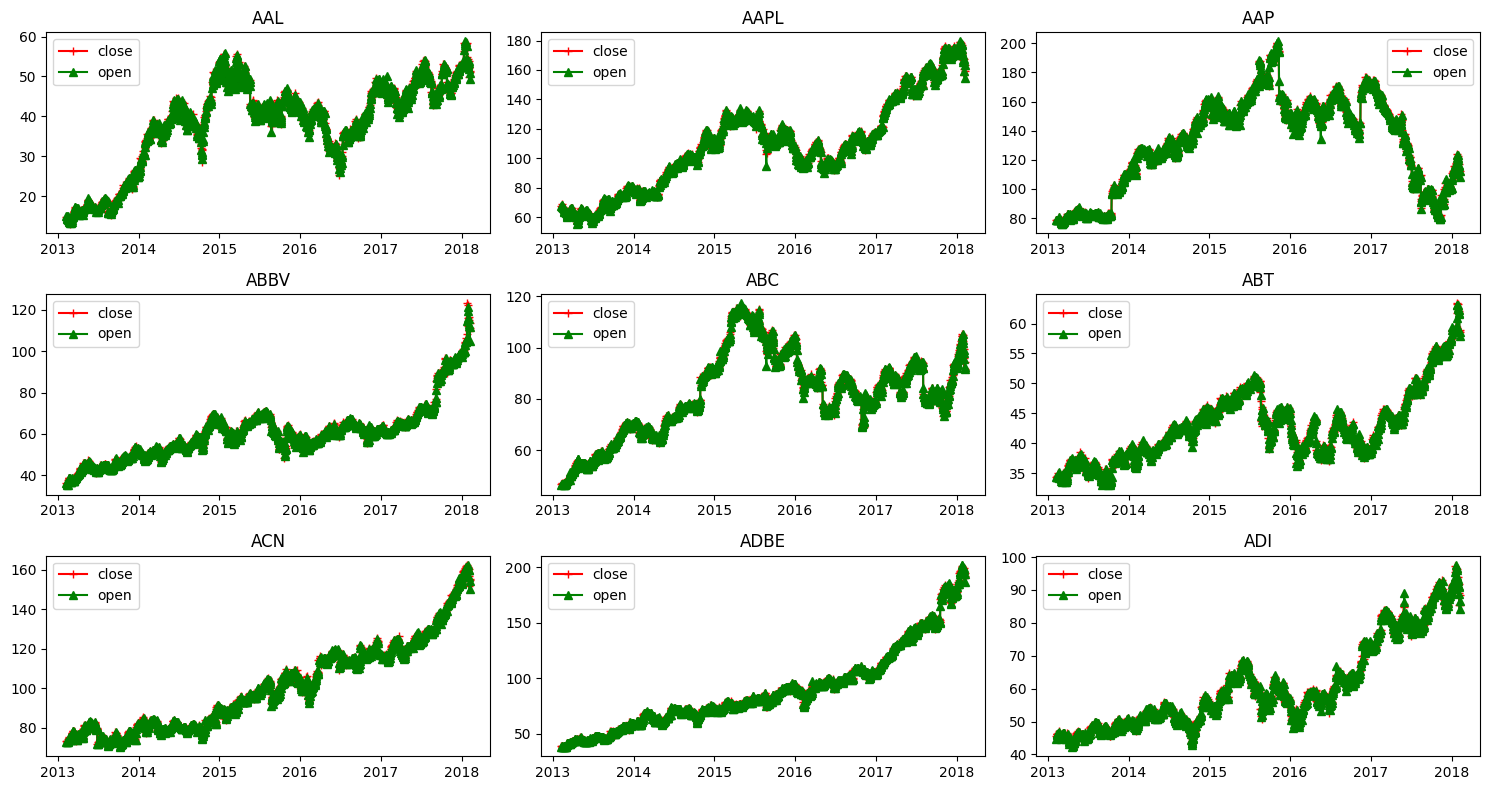

In [5]:
data['date'] = pd.to_datetime(data['date']) 
# date vs open 
# date vs close 
plt.figure(figsize=(15, 8)) 
companies = data['Name'].unique() 
for index, company in enumerate(companies, 1): 
	plt.subplot(3, 3, index) 
	c = data[data['Name'] == company] 
	plt.plot(c['date'], c['close'], c="r", label="close", marker="+") 
	plt.plot(c['date'], c['open'], c="g", label="open", marker="^") 
	plt.title(company) 
	plt.legend() 
	plt.tight_layout() 


ValueError: num must be an integer with 1 <= num <= 9, not 10

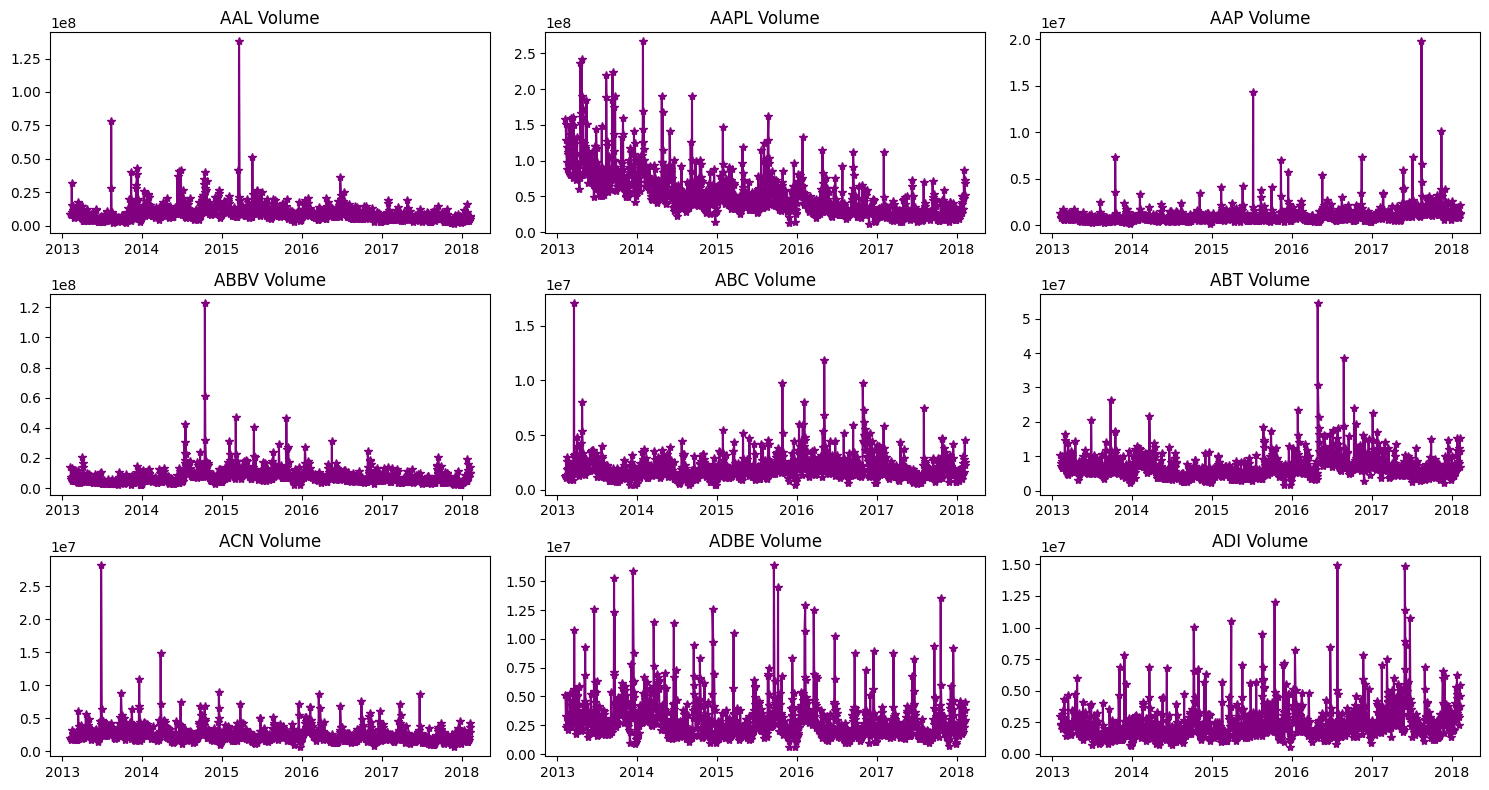

In [ ]:
plt.figure(figsize=(15, 8)) 
for index, company in enumerate(companies, 1): 
	plt.subplot(3, 3, index) 
	c = data[data['Name'] == company] 
	plt.plot(c['date'], c['volume'], c='purple', marker='*') 
	plt.title(f"{company} Volume") 
	plt.tight_layout() 


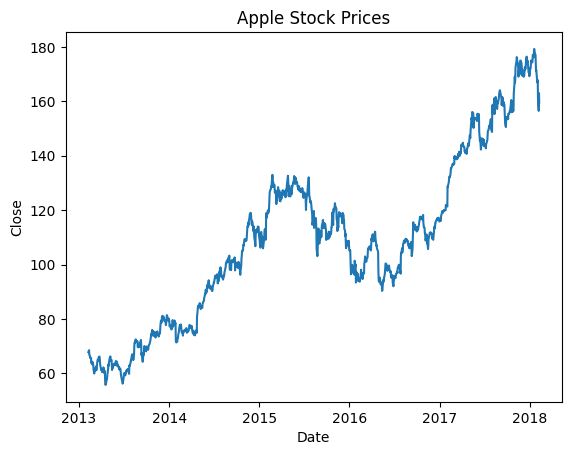

In [6]:
apple = data[data['Name'] == 'AAPL'] 
prediction_range = apple.loc[(apple['date'] > datetime(2013,1,1)) 
& (apple['date']<datetime(2018,1,1))] 
plt.plot(apple['date'],apple['close']) 
plt.xlabel("Date") 
plt.ylabel("Close") 
plt.title("Apple Stock Prices") 
plt.show()


In [7]:
close_data = apple.filter(['close']) 
dataset = close_data.values 
training = int(np.ceil(len(dataset) * .95)) 
print(training) 


1197


In [8]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset) 

train_data = scaled_data[0:int(training), :] 
# prepare feature and labels 
x_train = [] 
y_train = [] 

for i in range(60, len(train_data)): 
	x_train.append(train_data[i-60:i, 0]) 
	y_train.append(train_data[i, 0]) 

x_train, y_train = np.array(x_train), np.array(y_train) 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) 


In [9]:
model = keras.models.Sequential() 
model.add(keras.layers.LSTM(units=64, 
                             return_sequences=True, 
                             input_shape=(x_train.shape[1], 1))) 
model.add(keras.layers.LSTM(units=64)) 
model.add(keras.layers.Dense(32)) 
model.add(keras.layers.Dropout(0.5)) 
model.add(keras.layers.Dense(1)) 
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,033 (203.25 KB)

 Trainable params: 52,033 (203.25 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam', 
			loss='mean_squared_error') 
history = model.fit(x_train, 
					y_train, 
					epochs=10) 


Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0636
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0142
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0096
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0077
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0076
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0072
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0070
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0071
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0063
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0067


In [11]:
test_data = scaled_data[training - 60:, :] 
x_test = [] 
y_test = dataset[training:, :] 
for i in range(60, len(test_data)): 
	x_test.append(test_data[i-60:i, 0]) 

x_test = np.array(x_test) 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1)) 

# predict the testing data 
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions) 

# evaluation metrics 
mse = np.mean(((predictions - y_test) ** 2)) 
print("MSE", mse) 
print("RMSE", np.sqrt(mse)) 


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
MSE 57.26087919289987
RMSE 7.567091858362754


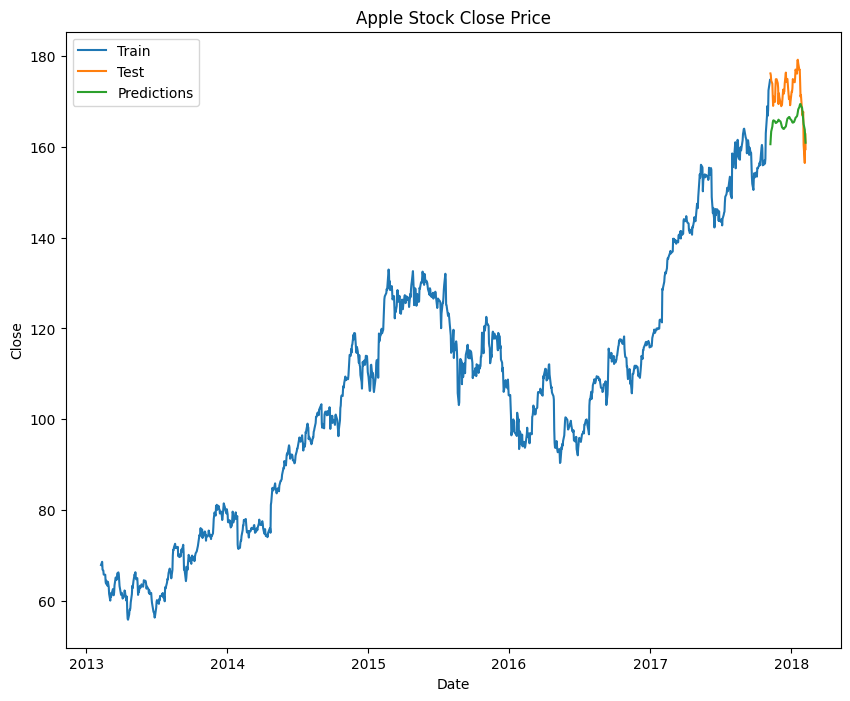

In [12]:
train = apple[:training] 
test = apple[training:] 
test['Predictions'] = predictions 

plt.figure(figsize=(10, 8)) 
plt.plot(train['date'], train['close'])  # Assuming the date column is named 'date'
plt.plot(test['date'], test[['close', 'Predictions']]) 
plt.title('Apple Stock Close Price') 
plt.xlabel('Date') 
plt.ylabel("Close") 
plt.legend(['Train', 'Test', 'Predictions']) 
plt.show()
